In [101]:
 ### gieStain #############################color sheme for the schema for Chromosome Band (Ideogram)

  # #FFFFFF - gneg    - Giemsa negative bands (white)
  # #999999 - gpos25  - Giemsa positive bands (dark grey)
  # #666666 - gpos50  - Giemsa positive bands (very dark grey)
  # #333333 - gpos75  - Giemsa positive bands (very dark grey)
  # #000000 - gpos100 - Giemsa positive bands (black)
  # #660033 - acen    - centromeric regions (very dark pink)
  # #660099 - gvar    - variable length heterochromatic regions (dark violet)
  # #6600cc - stalk   - tightly constricted regions on the short arms of (Strong violet)
  #                     the acrocentric chromosomes



In [102]:
#Enter Values for Start and End break points
p_break='p11'
q_break='q13'
txt_file='cytoBand.txt'

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

color_map={'gneg':'#FFFFFF',   
'gpos25':'#999999', 
'gpos50':'#666666', 
'gpos75':'#333333', 
'gpos100':'#000000',
'acen':'#660033',   
'gvar':'#660099',   
'stalk':'#6600cc'}

In [104]:
#read txt file and then filter by chr 4 and change the index
df = pd.read_csv(txt_file,sep='\t', header=None)
df = df[df[0]=='chr22']
df = df.rename(columns={0:'chrom',1:'chromStart',2:'chromEnd',3:'name',4:'gieStain'})
df = df.reset_index()
df = df.drop(columns='index')
df

,chrom,chromStart,chromEnd,name,gieStain
0,chr22,0,3800000,p13,gvar
1,chr22,3800000,8300000,p12,stalk
2,chr22,8300000,12200000,p11.2,gvar
3,chr22,12200000,14700000,p11.1,acen
4,chr22,14700000,17900000,q11.1,acen
5,chr22,17900000,22200000,q11.21,gneg
6,chr22,22200000,23500000,q11.22,gpos25
7,chr22,23500000,25900000,q11.23,gneg
8,chr22,25900000,29600000,q12.1,gpos50
9,chr22,29600000,32200000,q12.2,gneg


In [105]:
# Adding colors to stain and calculating length of band
length=[]
for i in range(df.shape[0]):
    df.gieStain.iloc[i]=color_map[df.gieStain.iloc[i]]
    length.append(df.chromEnd.iloc[i]-df.chromStart.iloc[i])
df['length']=length
df

/Users/shivanikushwaha/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,chrom,chromStart,chromEnd,name,gieStain,length
0,chr22,0,3800000,p13,#660099,3800000
1,chr22,3800000,8300000,p12,#6600cc,4500000
2,chr22,8300000,12200000,p11.2,#660099,3900000
3,chr22,12200000,14700000,p11.1,#660033,2500000
4,chr22,14700000,17900000,q11.1,#660033,3200000
5,chr22,17900000,22200000,q11.21,#FFFFFF,4300000
6,chr22,22200000,23500000,q11.22,#999999,1300000
7,chr22,23500000,25900000,q11.23,#FFFFFF,2400000
8,chr22,25900000,29600000,q12.1,#666666,3700000
9,chr22,29600000,32200000,q12.2,#FFFFFF,2600000


In [106]:
# Calculate the closest positions to the input breakpoints
p_n=[]
q_n=[]
for i in df.name.values:
    if 'p' in i:
        p_n.append(float(i[1:]))
    if 'q' in i:
        q_n.append(float(i[1:]))

p_break_n=min(p_n, key=lambda x:abs(x-float(p_break[1:])))
q_break_n=min(q_n, key=lambda x:abs(x-float(q_break[1:])))

# Find the positions of p and q breakpoint in the dataframe
p_break_i = df[df.name.str.match('p'+str(p_break_n))].index.values[0]
q_break_i = df[df.name.str.match('q'+str(q_break_n))].index.values[0]+1
df = df.iloc[p_break_i:q_break_i]

#add white band to indicate breakpoint in the chormosome based on the chromosome band average
df.loc[len(df.index)+2] = ['breakpoint', 'NA','NA','NA', '#FFFFFF',df.length.mean()] 
df

/Users/shivanikushwaha/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


,chrom,chromStart,chromEnd,name,gieStain,length
3,chr22,12200000,14700000,p11.1,#660033,2500000
4,chr22,14700000,17900000,q11.1,#660033,3200000
5,chr22,17900000,22200000,q11.21,#FFFFFF,4300000
6,chr22,22200000,23500000,q11.22,#999999,1300000
7,chr22,23500000,25900000,q11.23,#FFFFFF,2400000
8,chr22,25900000,29600000,q12.1,#666666,3700000
9,chr22,29600000,32200000,q12.2,#FFFFFF,2600000
10,chr22,32200000,37600000,q12.3,#666666,5400000
11,breakpoint,NA,NA,NA,#FFFFFF,3200000


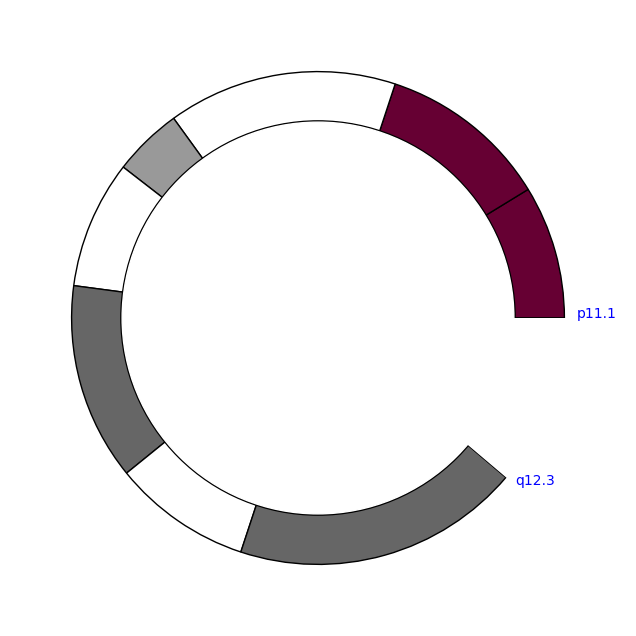

In [107]:
plt.figure(figsize=(12,8))
# Create a pieplot
wedges,text = plt.pie(df['length'],colors=df['gieStain'], radius=1, startangle=0,wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
#wedges[-1].set_visible(False) 

# add a circle at the center to transform it in a donut chart
inner_circle=plt.Circle( (0,0), 0.8, color='black')
outer_circle= plt.Circle( (0,0), 0.795, color='white')
reuse_wedge=wedges[-1]
import matplotlib
new_wedge = matplotlib.patches.Wedge(reuse_wedge.center, reuse_wedge.r+0.01, reuse_wedge.theta1, reuse_wedge.theta2,fc='white')

# add the new wedge to the same axes object
p=plt.gcf()
plt.gca().add_artist(inner_circle)
plt.gca().add_artist(outer_circle)
plt.gca().add_patch(new_wedge)

# calculate the position of the end of the wedge
angle = reuse_wedge.theta1 
radius = reuse_wedge.r * 1.05  # increase the radius by a factor of 1.05
x = reuse_wedge.center[0] + np.cos(np.deg2rad(angle)) * radius
y = reuse_wedge.center[1] + np.sin(np.deg2rad(angle)) * radius 

plt.annotate(df.name.iloc[0], xy=reuse_wedge.center, xytext=(reuse_wedge.center[0]+1.05, reuse_wedge.center[1]),color='blue')
plt.annotate(df.name.iloc[-2], xy=(x, y),color='blue')

plt.savefig('chr22.jpg')
plt.show()




In [108]:
reuse_wedge.theta1

319.72027748823166